In [1]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, ZeroPadding2D
from tensorflow.keras.optimizers import SGD, Adadelta
from tensorflow.keras import layers
import numpy as np
import cv2
import visualkeras

from matplotlib import pyplot as plt
from tensorflow import keras
from keras_visualizer import visualizer 

## 1. Lectura del dataset MNIST

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


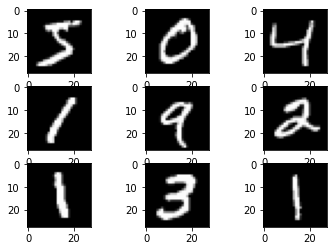

In [2]:
#Carga
(trainX, trainY), (testX, testY) = mnist.load_data()

#Dimensiones de train y test
print('Train: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Test: X=%s, y=%s' % (testX.shape, testY.shape))

#Ploteo de ejemplos
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
    
plt.show()

## 2. Procesamiento del dataset MNIST

In [3]:
#Redimensión de las imágenes
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

#Codificación One Hot
trainY = to_categorical(trainY)
testY = to_categorical(testY)

#Formato de valor de píxeles
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0

## 3. Definición del modelo

In [7]:
input_shape = (28,28,1)
num_classes = len(trainY[0])

In [8]:
model = Sequential()

model.add(Conv2D(64, kernel_size = (5, 5), activation='relu', input_shape = input_shape))
model.add(Conv2D(128, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(Dropout(0.2))

#Flatten
model.add(Flatten())

#Fully Connected
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.5))

#Salida con Softmax
model.add(Dense(num_classes, activation='softmax'))

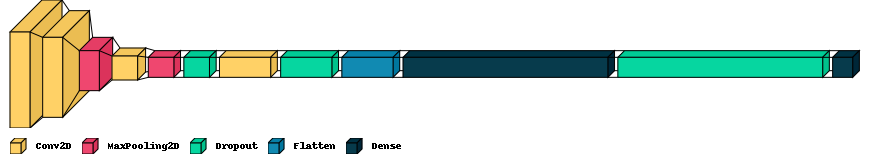

In [9]:
visualkeras.layered_view(model, legend=True) 

## 4. Compilación y entrenamiento del modelo

In [10]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [11]:
batch_size = 64
num_epoch = 5

model_log = model.fit(train_norm, trainY, batch_size=batch_size, epochs = num_epoch, verbose = 1, 
                      validation_data = (test_norm, testY))

Epoch 1/5
938/938 [==============================] - 758s 807ms/step - loss: 0.1402 - accuracy: 0.9561 - val_loss: 0.0416 - val_accuracy: 0.9869
Epoch 2/5
938/938 [==============================] - 720s 768ms/step - loss: 0.0484 - accuracy: 0.9866 - val_loss: 0.0360 - val_accuracy: 0.9898
Epoch 3/5
938/938 [==============================] - 454s 484ms/step - loss: 0.0392 - accuracy: 0.9890 - val_loss: 0.0297 - val_accuracy: 0.9916
Epoch 4/5
938/938 [==============================] - 443s 472ms/step - loss: 0.0321 - accuracy: 0.9916 - val_loss: 0.0296 - val_accuracy: 0.9923
Epoch 5/5
938/938 [==============================] - 495s 528ms/step - loss: 0.0287 - accuracy: 0.9923 - val_loss: 0.0225 - val_accuracy: 0.9939


## 5. Evaluación

In [12]:
_, acc = model.evaluate(test_norm, testY, verbose = 1)

313/313 [==============================] - 16s 53ms/step - loss: 0.0225 - accuracy: 0.9939


In [13]:
test_norm.shape

(10000, 28, 28, 1)

## 6. Guardado del modelo

In [14]:
model.save('mnist_CNN_model.h5')